##Libraries

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [ ]:
!pip install -U nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import pandas as pd
import nltk
import re
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

##Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/belongstocita/dataset/refs/heads/main/Spotify_DATASET.csv'
df = pd.read_csv(url)
df

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
...,...,...
52697,Yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,POSITIVE
52700,Good,POSITIVE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [ ]:
print("Duplicates in Dataset: ",df.duplicated().sum())

Duplicates in Dataset:  1229


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Review,1,0.0
label,0,0.0


In [ ]:
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts

,label,count
0,NEGATIVE,29345
1,POSITIVE,22128


#EDA

In [ ]:
class EDA():
    def get_length_dist(self, data):
        # Filter out non-string values (e.g., NaN) before calculating length
        rev_len = [len(i) for i in data if isinstance(i, str)]
        pd.Series(rev_len).hist()
        plt.title('Number of types of comments')
        plt.xlabel('length')
        plt.ylabel('number')
        plt.show()
        print(pd.Series(rev_len).describe())

    def get_class_dist(self, df):
        df['label'].replace({1: 'positive', 0: 'negative'}).value_counts().plot(kind='bar', figsize=(7, 4))
        plt.title('Number of types')
        plt.xlabel('Comment_type')
        plt.ylabel('number')
        plt.show()

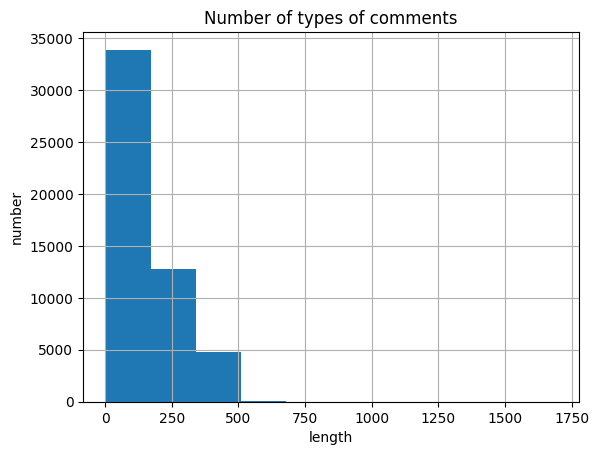

count    51472.000000
mean       154.735351
std        120.027837
min          2.000000
25%         63.000000
50%        120.000000
75%        211.000000
max       1693.000000
dtype: float64


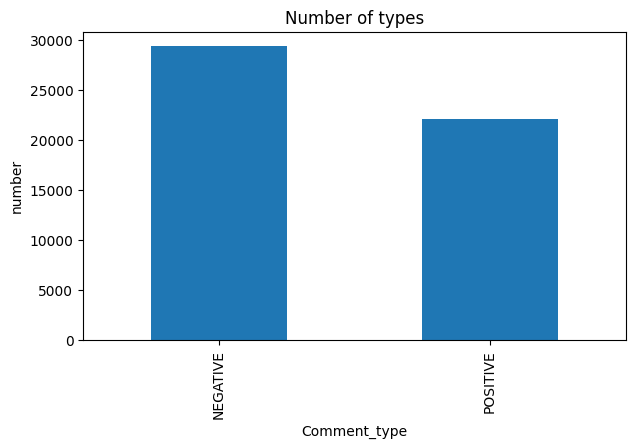

In [ ]:
eda = EDA()
eda.get_length_dist(df['Review'])
eda.get_class_dist(df)

#Text Preprocessing

In [ ]:
def preprocess_text(text):
    # Handle non-string values by converting them to strings
    if not isinstance(text, str):
        text = str(text)
    # Remove HTML tags and strip whitespace
    text = re.sub(r'<[^>]*>', '', text)
    text = text.strip()
    # Remove noisy characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Lowercase text
    text = text.lower()
    # Tokenize text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['Review'] = df['Review'].apply(preprocess_text)

df['Review'].head(20)

,Review
0,great music service audio high quality app eas...
1,please ignore previous negative rating app sup...
2,popup get best spotify experience android 12 a...
3,really buggy terrible use recently
4,dear spotify get songs didnt put playlist shuf...
5,player controls sometimes disappear reason app...
6,love selection lyrics provided song youre list...
7,still extremely slow changing storage external...
8,great app best mp3 music app ever used one pro...
9,im deleting app following reasons app failing ...


In [ ]:
!pip install wordcloud matplotlib

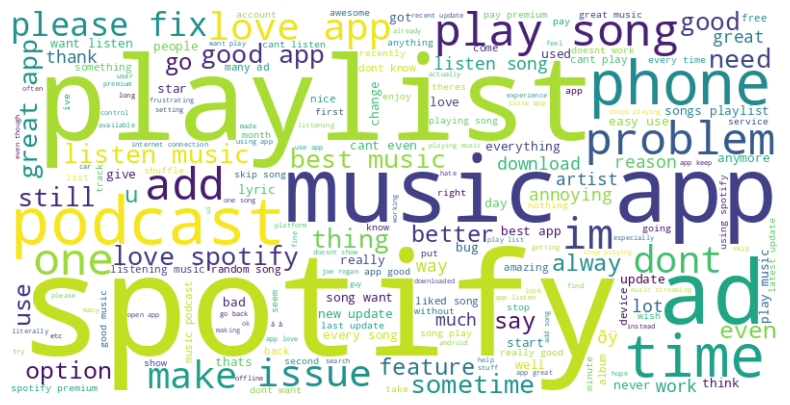

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
text = ' '.join(df['Review'].astype(str).tolist())

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Model

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import regularizers

In [ ]:
X = df['Review']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Tokenizing Words (Numerical)

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_length = len(word_tokenizer.word_index)+1
vocab_length

24519

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Padding

In [ ]:
max_len=100
X_train=pad_sequences(X_train, padding='post',maxlen=max_len)
X_test=pad_sequences(X_test, padding='post',maxlen=max_len)

Embedding (GloVe)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-11-19 04:14:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-19 04:14:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-19 04:14:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_length, embedding_dim))

def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open('glove.6B.100d.txt'))

for word, i in word_tokenizer.word_index.items():
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass

embedding_layer = Embedding(vocab_length, embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Classification

###RNN

In [ ]:
model_rnn = Sequential()

model_rnn.add(embedding_layer)
model_rnn.add(SimpleRNN(64, return_sequences=False,
               kernel_regularizer=regularizers.l2(0.01)))
model_rnn.add(Dropout(0.7))
model_rnn.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model_rnn.add(Dropout(0.7))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, restore_best_weights=True)

history_rnn = model_rnn.fit(X_train, y_train,
                    epochs=10, batch_size=128,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5566 - loss: 1.7944 - val_accuracy: 0.7545 - val_loss: 1.4091
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7211 - loss: 1.3630 - val_accuracy: 0.8029 - val_loss: 1.1109
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7852 - loss: 1.1166 - val_accuracy: 0.8304 - val_loss: 0.9257
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8128 - loss: 0.9646 - val_accuracy: 0.8390 - val_loss: 0.8159
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8221 - loss: 0.8545 - val_accuracy: 0.8453 - val_loss: 0.7286
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8303 - loss: 0.7783 - val_accuracy: 0.8461 - val_loss: 0.6704
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8354 - loss: 0.7153 - val_accuracy: 0.8457 - val_loss: 0.6220
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8379 - loss: 0.6703 - val_acc

In [ ]:
loss, accuracy = model_rnn.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8535 - loss: 0.5268
Test Accuracy: 0.8514


In [ ]:
y_pred = (model_rnn.predict(X_test) > 0.5).astype("int32")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.4f}')

322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy Score: 0.8514


###LSTM

In [ ]:
model_lstm = Sequential()

model_lstm.add(embedding_layer)

model_lstm.add(LSTM(64, return_sequences=False,
                    kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dropout(0.7))
model_lstm.add(Dense(32, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01)))
model_lstm.add(Dropout(0.7))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer=Adam(learning_rate=0.0001),
                   loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train,
                         epochs=10, batch_size=128,
                         validation_data=(X_test, y_test),
                         callbacks=[early_stopping])

Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5624 - loss: 2.2829 - val_accuracy: 0.8120 - val_loss: 1.5012
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7611 - loss: 1.3868 - val_accuracy: 0.8506 - val_loss: 1.0047
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8418 - loss: 0.9855 - val_accuracy: 0.8589 - val_loss: 0.7590
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8513 - loss: 0.7748 - val_accuracy: 0.8551 - val_loss: 0.6424
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8568 - loss: 0.6561 - val_accuracy: 0.8631 - val_loss: 0.5596
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8607 - loss: 0.5889 - val_accuracy: 0.8618 - val_loss: 0.5161
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8596 - loss: 0.5434 - val_accuracy: 0.8614 - val_loss: 0.4824
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8622 - loss: 0.5119 - val_accurac

In [ ]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.4135
Test Accuracy: 0.8660


In [ ]:
y_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.4f}')

322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy Score: 0.8660


###Result

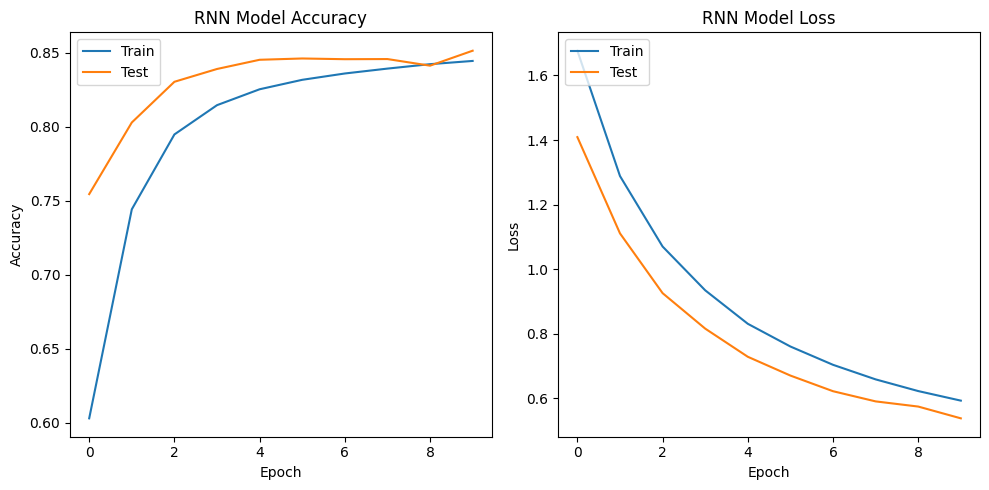

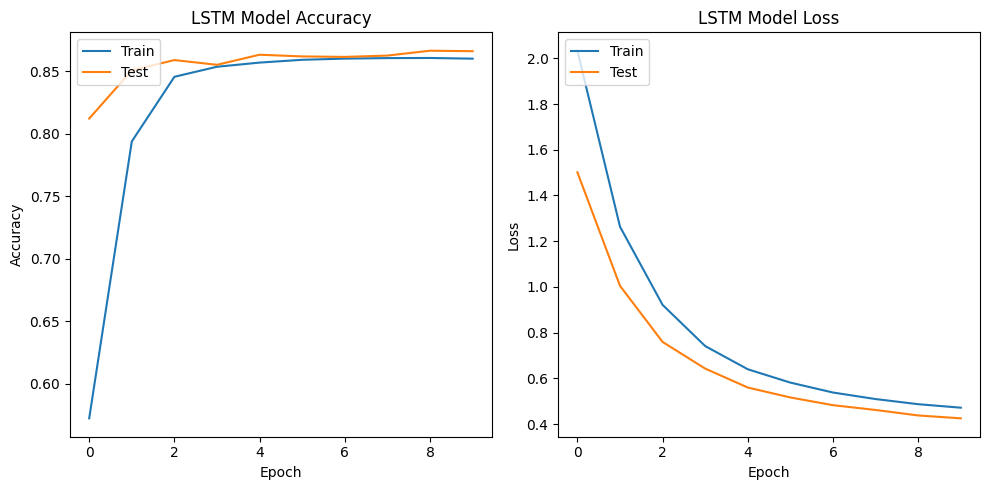

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name):
    plt.figure(figsize=(10, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_training_history(history_rnn, 'RNN')
plot_training_history(history_lstm, 'LSTM')

322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


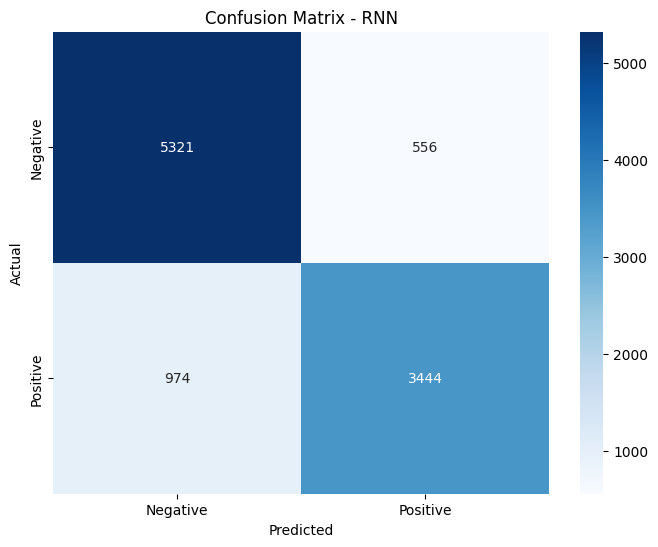

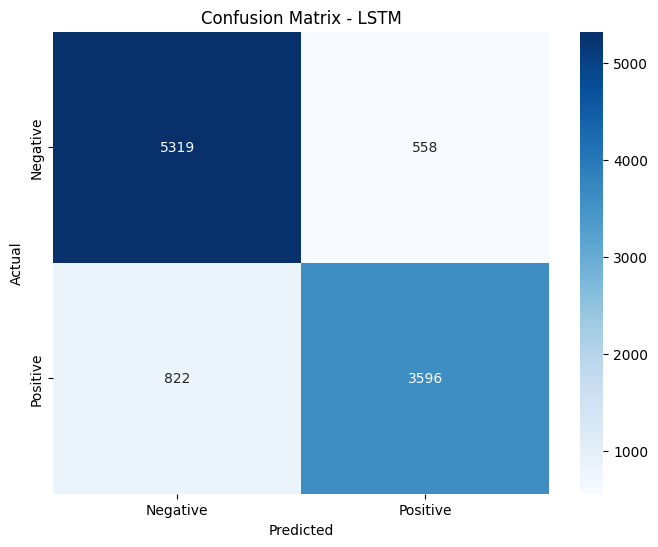

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")

y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rnn, 'RNN')
plot_confusion_matrix(y_test, y_pred_lstm, 'LSTM')

In [ ]:
results_df_rnn = pd.DataFrame({'Actual Sentiment': y_test,
                               'Predicted Sentiment': y_pred_rnn.flatten()})

results_df_lstm = pd.DataFrame({'Actual Sentiment': y_test,
                                'Predicted Sentiment': y_pred_lstm.flatten()})

sentiment_mapping = {0: 'Negative', 1: 'Positive'}

for df in [results_df_rnn, results_df_lstm]:
    df['Actual Sentiment'] = df['Actual Sentiment'].map(sentiment_mapping)
    df['Predicted Sentiment'] = df['Predicted Sentiment'].map(sentiment_mapping)

print("RNN Results:")
print(results_df_rnn)

print("\nLSTM Results:")
print(results_df_lstm)

RNN Results:
      Actual Sentiment Predicted Sentiment
0             Negative            Negative
1             Negative            Negative
2             Negative            Negative
3             Negative            Negative
4             Negative            Negative
...                ...                 ...
10290         Negative            Negative
10291         Negative            Negative
10292         Positive            Positive
10293         Negative            Negative
10294         Positive            Positive

[10295 rows x 2 columns]

LSTM Results:
      Actual Sentiment Predicted Sentiment
0             Negative            Negative
1             Negative            Negative
2             Negative            Negative
3             Negative            Negative
4             Negative            Negative
...                ...                 ...
10290         Negative            Negative
10291         Negative            Negative
10292         Positive            Positive
